In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
import os
import sys
print("at directory:", os.getcwd())
print("changing to root directory")
os.chdir("../../..")
print("at directory:", os.getcwd())

import sys
sys.path.append("projects/online_dyna")

at directory: /Users/wilka/git/research/web-human-rl/projects/online_dyna/notebooks
changing to root directory
at directory: /Users/wilka/git/research/web-human-rl


In [4]:
import jax
import jax.numpy as jnp
import json
import functools

from xminigrid.rendering.rgb_render import render
import numpy as np
from IPython.display import Image



from projects.humansf import visualizer
from projects.online_dyna import keyroom
from projects.online_dyna import minigrid_common
import utils

/Users/wilka/miniforge3/envs/webrl/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
import json

# Open the file and load the JSON data
with open("projects/online_dyna/maze_pairs.json", "r") as file:
    maze_config = json.load(file)[0]

In [6]:
maze_config = 
{'keys': [['key', 'grey'],
          ['key', 'red'],
          ['key', 'purple'],
          ['key', 'yellow']],
 'pairs': [[['box', 'blue'], ['ball', 'blue']],
           [['box', 'purple'], ['box', 'green']],
           [['ball', 'green'], ['box', 'yellow']],
           [['key', 'blue'], ['key', 'green']]]}
from pprint import pprint


pprint(maze_config)

num_rooms = 3
size=16
env = utils.KeyRoomUpDownLeftRight(
    train_episode_ends_on_pair_pickup=False,
)
env_params = env.default_params(
    maze_config=keyroom.shorten_maze_config(maze_config, num_rooms),
    height=size,
    width=size,
    random_obj_loc=True,
)
env_params

{'keys': [['key', 'grey'],
          ['key', 'red'],
          ['key', 'purple'],
          ['key', 'yellow']],
 'pairs': [[['box', 'blue'], ['ball', 'blue']],
           [['box', 'purple'], ['box', 'green']],
           [['ball', 'green'], ['box', 'yellow']],
           [['key', 'blue'], ['key', 'green']]]}


KeyRoomEnvParams(height=19, width=19, view_size=7, render_mode='rgb_array', random_door_loc=False, random_obj_loc=True, train_multi_probs=0.5, training=True, time_limit=150, maze_config={'keys': Array([[9, 8],
       [9, 3],
       [9, 6]], dtype=uint8), 'pairs': Array([[[6, 5],
        [5, 5]],

       [[6, 6],
        [6, 4]],

       [[5, 4],
        [6, 7]]], dtype=uint8)}, task_objects=Array([[[ 9,  8,  1,  1],
        [12,  8,  1,  0],
        [ 6,  5,  1,  1],
        [ 5,  5,  1,  1]],

       [[ 9,  3,  1,  1],
        [12,  3,  1,  0],
        [ 6,  6,  1,  1],
        [ 6,  4,  1,  1]],

       [[ 9,  6,  1,  1],
        [12,  6,  1,  0],
        [ 5,  4,  1,  1],
        [ 6,  7,  1,  1]]], dtype=uint8), train_w=Array([[0.25, 0.5 , 1.  , 0.  ],
       [0.25, 0.5 , 1.  , 0.  ],
       [0.25, 0.5 , 1.  , 0.  ]], dtype=float32), test_w=Array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32))

In [7]:
def render(timestep):
    return utils.render(
        np.asarray(timestep.state.grid),
        timestep.state.agent,
        0,
        tile_size=20)


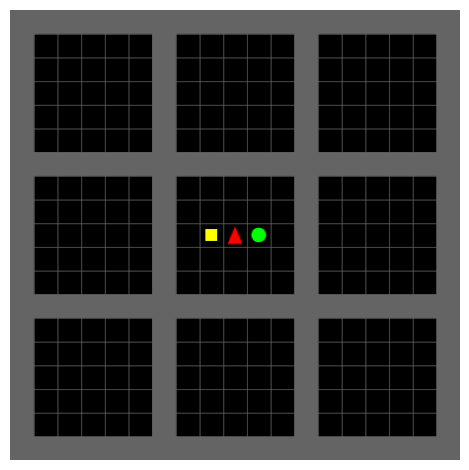

In [38]:
import jax 
seed=10

num_rooms = 3
size=19
env = utils.KeyRoomUpDownLeftRight(
    train_episode_ends_on_pair_pickup=False,
)
env_params = env.default_params(
    maze_config=keyroom.shorten_maze_config(maze_config, num_rooms),
    height=size,
    width=size,
    random_obj_loc=True,
)
env_params

rng = jax.random.PRNGKey(seed)
rng, rng_ = jax.random.split(rng)
env_params = env_params.replace(random_obj_loc=False, train_multi_probs=0.)
timestep = env.reset(rng_, env_params)
# print(timestep.observation.task_w)

# get image of full state
state_image = render(timestep)
visualizer.display_image(state_image)



# timestep = env.step(rng_, timestep, 2, env_params)
# timestep = env.step(rng_, timestep, 1, env_params)
# timestep = env.step(rng_, timestep, 4, env_params)
# timestep = env.step(rng_, timestep, 3, env_params)

# state_image = render(timestep)
# visualizer.display_image(state_image)


In [51]:
keys = env_params.maze_config['keys']

def randomize(x, rng=None):
    # Generate random permutation indices
    permutation = jax.random.permutation(rng, x.shape[0])

    # Apply permutation to the array
    return x[permutation]


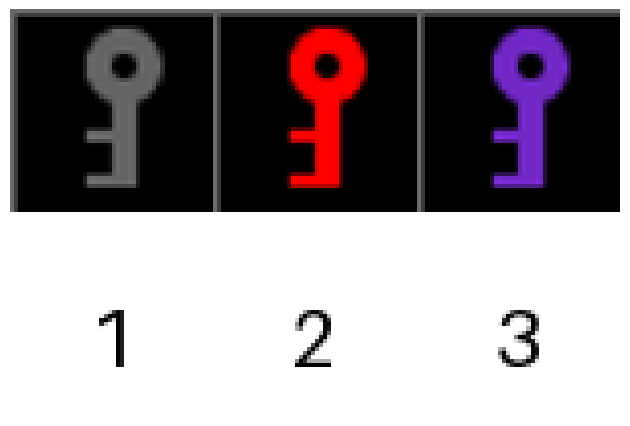

(100, 150, 3)

In [24]:


keys = utils.permute(keys, jax.random.PRNGKey(1))
image = utils.objects_with_number(keys)
visualizer.display_image(image)
image.shape

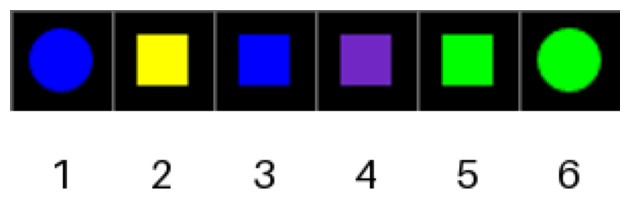

(100, 300, 3)

In [25]:
pairs = env_params.maze_config['pairs']
pairs = pairs.reshape(-1, 2)

pairs = utils.permute(pairs, jax.random.PRNGKey(1))
image = utils.objects_with_number(pairs)
visualizer.display_image(image)
image.shape

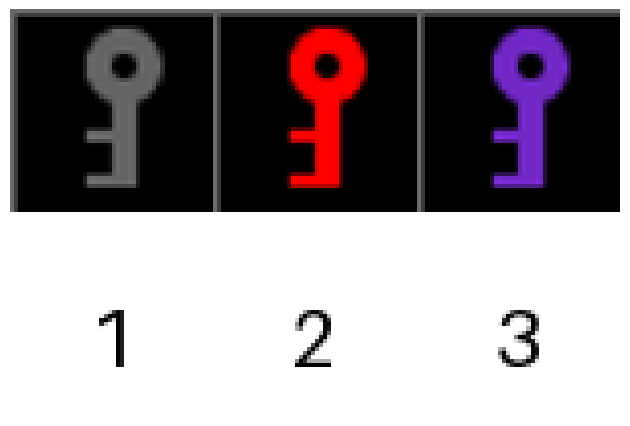

2

## 